In [118]:
# 3.
#  "Anime-dataset-2023.csv","user-details-2023.csv","user-score-2023.csv"를 사용하여 연령 등급(Rating)별 장르 분석
# -> plot ,Bar chart with gradients 으로 시각화  
# 사용 컬럼 :   
#    Anime-dataset-2023.csv : Rating, anime_id  
#    user-details-2023.csv : Gender, Username  
#    user-score-2023.csv : Username, anime_id, rating  

In [119]:
import pandas as pd # 판다스 모듈 갖고오기
import numpy as np # 넘피 모듈 갖고오기
import matplotlib.pyplot as plt # pyplot 모듈 갖고오기
import matplotlib as mpl # matplotlib 패키지 갖고오기
import matplotlib.font_manager as fm # font_manager 갖고오기
import datetime as dt # datatime 모듈 갖고오기


import SampleData as d # SampleData.py의 변수 사용


font_path=r'c:\WINDOWS\Fonts\H2MJRE.TTF' # 한글 출력 설정
myFont=fm.FontProperties(fname=font_path).get_name()
mpl.rc('font',family=myFont)

In [120]:
result = d.user_details.dropna(subset="Birthday") # 생일에서 년도를 뽑아옴
result["Birthday"]=result["Birthday"].str[:4]
result

C:\Users\mathn\AppData\Local\Temp\ipykernel_39912\2610207545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Birthday"]=result["Birthday"].str[:4]


,user_id,Username,Gender,Birthday,Location,Mean Score,Completed,Total Entries
0,1,Xinil,Male,1985,California,7.37,233.0,399
5,20,vondur,Male,1988,"Bergen, Norway",8.06,94.0,138
6,23,Amuro,Non-Binary,1988,Canada,7.41,298.0,392
11,66,Hiromi,Male,1990,"Calgary, AB",7.53,148.0,211
12,70,Cruzle,Male,1983,NaN,7.18,135.0,204
...,...,...,...,...,...,...,...,...
731266,1291009,blazkiller123,Male,1994,"Palm Desert, CA",8.72,142.0,245
731269,1291017,alexlil,Male,1996,"Toronto, Ontario",8.20,554.0,660
731270,1291021,Ftv-kun,Male,1991,"Moscow, Russia",7.62,77.0,102
731280,1291057,imjustjk,Male,1997,"Newport Coast, California",7.00,181.0,242


In [121]:
# 날짜 데이터 타입으로 변환
result["Birthday"]=result["Birthday"].astype("int32") # 타입을 정수로 바꾸고
result["Birthday"]=result["Birthday"].sub(2023).mul(-1) # 나이 계산
result

C:\Users\mathn\AppData\Local\Temp\ipykernel_39912\2381710914.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Birthday"]=result["Birthday"].astype("int32")
C:\Users\mathn\AppData\Local\Temp\ipykernel_39912\2381710914.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Birthday"]=result["Birthday"].sub(2023).mul(-1)


,user_id,Username,Gender,Birthday,Location,Mean Score,Completed,Total Entries
0,1,Xinil,Male,38,California,7.37,233.0,399
5,20,vondur,Male,35,"Bergen, Norway",8.06,94.0,138
6,23,Amuro,Non-Binary,35,Canada,7.41,298.0,392
11,66,Hiromi,Male,33,"Calgary, AB",7.53,148.0,211
12,70,Cruzle,Male,40,NaN,7.18,135.0,204
...,...,...,...,...,...,...,...,...
731266,1291009,blazkiller123,Male,29,"Palm Desert, CA",8.72,142.0,245
731269,1291017,alexlil,Male,27,"Toronto, Ontario",8.20,554.0,660
731270,1291021,Ftv-kun,Male,32,"Moscow, Russia",7.62,77.0,102
731280,1291057,imjustjk,Male,26,"Newport Coast, California",7.00,181.0,242


In [122]:
# 영유아기~유아기(0~6세)
# 잼민이 (7~12세)
# 청소년기 (13~18세)
# 젊은 성인기 (18~30세)
# 중년 (30~60세)
# 노년 (60~)

age=[0,6,12,18,30,60,100] # 나잇대별로 구분하는 list 생성
age_result = result["Birthday"].value_counts(bins=age).sort_index() #집계별 카운트 한 후 인덱스로 정렬
age_divider=[7,6,6,13,31,41] # 나이 구간별 너비 list 생성
for i, v in enumerate(age_divider):
    age_result.iloc[i]=round(age_result.iloc[i]/age_divider[0],1) # 연별로 가입자 평균화
age_result.index=["영유아기~유아기(0~6세)","잼민이 (7~12세)","청소년기 (13~18세)","젊은 성인기 (18~30세)","중년 (30~60세)","노년 (60~)"]
age_result

영유아기~유아기(0~6세)         5.1
잼민이 (7~12세)           46.7
청소년기 (13~18세)         62.4
젊은 성인기 (18~30세)     8652.3
중년 (30~60세)        15047.3
노년 (60~)             192.3
Name: count, dtype: float64

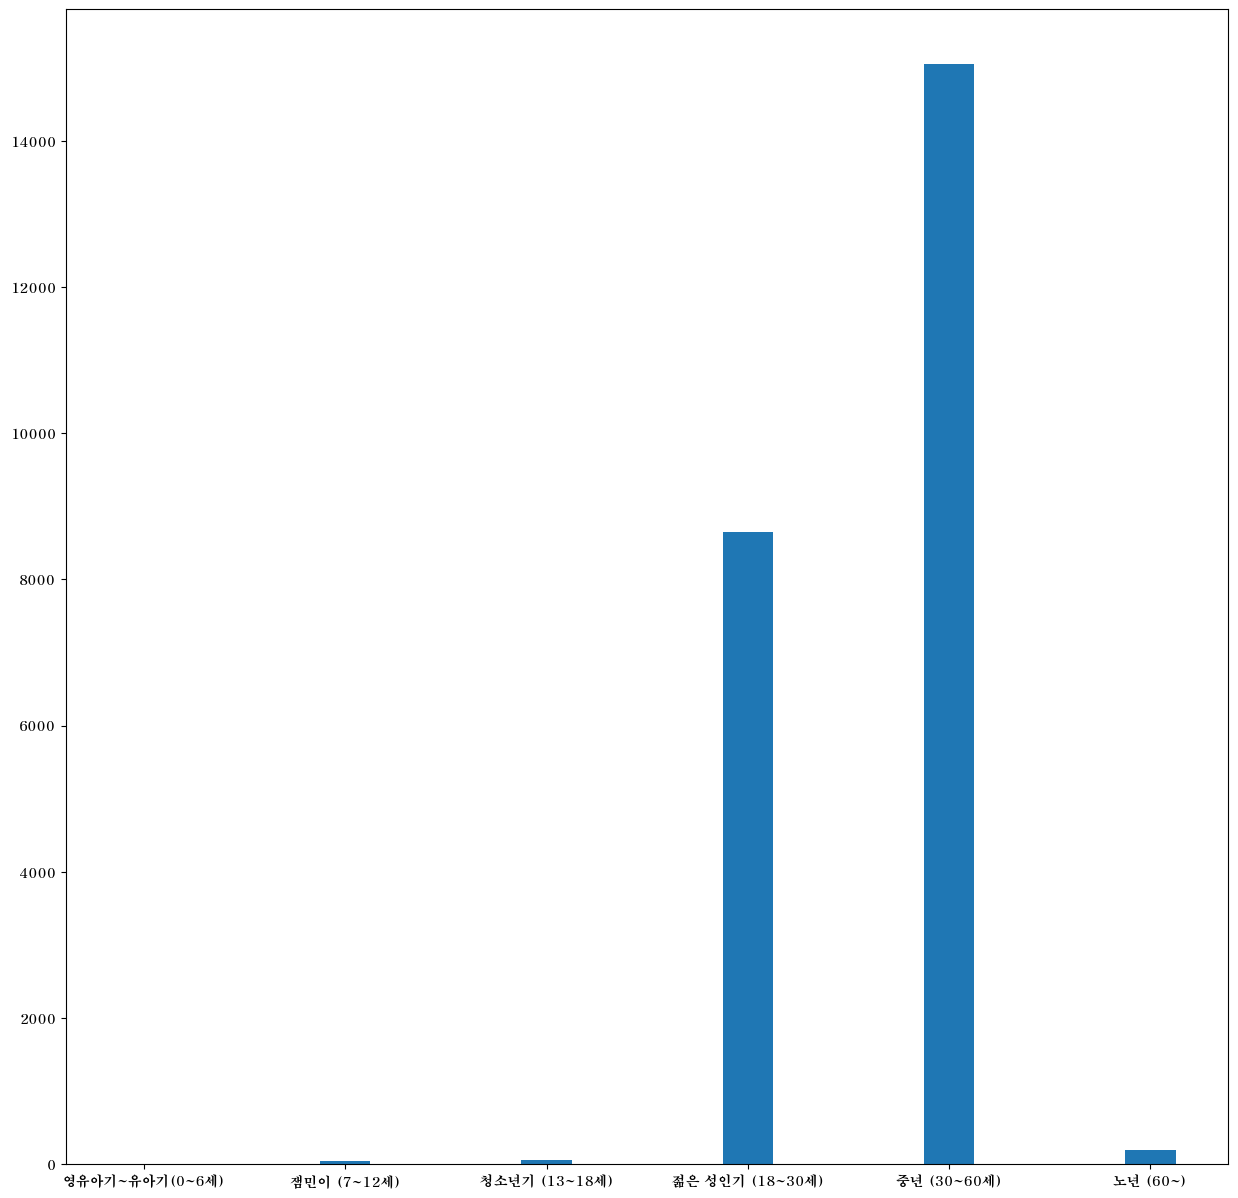

In [148]:
plt.figure(figsize=(15,15))

x=age_result.index
y=age_result.values
plt.bar(x,y,0.25, label=y)
plt.show()


In [123]:
result=result.reset_index() #인덱스를 균일하게 정렬

In [124]:
#print(d.user_score[d.user_score["Username"]==result["Username"][0]]) # Xinil이 본 애니메이션 anime_id목록
print(d.user_score[d.user_score["Username"]==result["Username"][0]])

     user_id Username  anime_id             Anime Title  rating
0          1    Xinil        21               One Piece       9
1          1    Xinil        48             .hack//Sign       7
2          1    Xinil       320                  A Kite       5
3          1    Xinil        49        Aa! Megami-sama!       8
4          1    Xinil       304  Aa! Megami-sama! Movie       8
..       ...      ...       ...                     ...     ...
257        1    Xinil       157    Mahou Sensei Negima!       6
258        1    Xinil      1453           Maison Ikkoku       6
259        1    Xinil      3226                Major S4       7
260        1    Xinil       860     Makai Senki Disgaea       6
261        1    Xinil       323         Mousou Dairinin       6

[262 rows x 5 columns]


In [126]:
total_dict=dict()
for idx in range(1000):
    watched_anime_list=list(d.user_score[d.user_score["Username"]==result["Username"][idx]]["anime_id"]) # Xinil이 본 애니메이션 anime_id목록
    genre_set=dict()
    for i in watched_anime_list :
        watched_genre = list(d.anime[["anime_id","Genres","Rating"]][d.anime["anime_id"]==i]["Genres"].str.split(", "))
        for j in watched_genre[0]:
            if j not in genre_set :
                genre_set.setdefault(j ,1)
            else :
                genre_set[j]+=1
    total_dict.setdefault(result["Username"][idx],genre_set)

In [127]:
result=pd.DataFrame(total_dict).fillna(0)
result

,Xinil,vondur,Amuro,Hiromi,Cruzle,koalatees,Achtor,luffykun,hazte,Ezzpify,...,jopchan121,satoupaku,yamato,darkmoon911,konxtajiya,nuzc0,hachibaka,hejdar,dakeru,xaynie
Action,105.0,61.0,202.0,68.0,99.0,6.0,50.0,78.0,59.0,2.0,...,105.0,6.0,36.0,2.0,20.0,0.0,76.0,29.0,67.0,47.0
Adventure,61.0,46.0,72.0,55.0,48.0,6.0,14.0,45.0,49.0,2.0,...,73.0,4.0,22.0,2.0,18.0,0.0,64.0,11.0,48.0,42.0
Fantasy,54.0,41.0,94.0,72.0,38.0,6.0,21.0,46.0,30.0,3.0,...,95.0,7.0,26.0,3.0,15.0,0.0,46.0,14.0,49.0,36.0
Mystery,22.0,11.0,31.0,13.0,14.0,5.0,17.0,3.0,6.0,1.0,...,13.0,5.0,11.0,0.0,6.0,0.0,48.0,3.0,7.0,27.0
Drama,89.0,26.0,55.0,109.0,58.0,25.0,62.0,26.0,24.0,3.0,...,99.0,7.0,41.0,2.0,4.0,0.0,92.0,40.0,47.0,56.0
Hentai,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Comedy,106.0,22.0,71.0,90.0,65.0,19.0,81.0,21.0,62.0,4.0,...,232.0,6.0,34.0,2.0,13.0,0.0,74.0,56.0,38.0,37.0
Romance,101.0,14.0,39.0,99.0,63.0,23.0,51.0,18.0,28.0,4.0,...,154.0,5.0,32.0,4.0,9.0,0.0,73.0,57.0,40.0,40.0
Supernatural,35.0,14.0,35.0,33.0,25.0,12.0,25.0,5.0,20.0,2.0,...,48.0,5.0,16.0,1.0,2.0,0.0,45.0,11.0,21.0,25.0
Award Winning,34.0,21.0,14.0,20.0,12.0,2.0,16.0,5.0,5.0,0.0,...,21.0,4.0,12.0,0.0,4.0,0.0,17.0,7.0,7.0,36.0


In [198]:
p0=round(result.idxmax().value_counts()/1000,3)
genre_translation = {
    'Comedy': '코미디',
    'Fantasy': '판타지',
    'UNKNOWN': '알 수 없음',
    'Action': '액션',
    'Adventure': '모험',
    'Sci-Fi': '과학 소설',
    'Drama': '드라마',
    'Romance': '로맨스',
    'Slice of Life': '일상',
    'Supernatural': '초자연적인',
    'Hentai': '헨타이',
    'Mystery': '미스터리',
    'Avant Garde': '아방가르드',
    'Ecchi': '에치',
    'Sports': '스포츠',
    'Horror': '호러',
    'Suspense': '서스펜스',
    'Award Winning': '수상작',
    'Boys Love': '보이즈 러브',
    'Gourmet': '미식',
    'Girls Love': '걸즈 러브',
    'Erotica': '에로티카'
}
add_col=[]
for i in (p0.keys()) : 
    add_col.append(genre_translation[i])
p0.index=add_col # 키값을 영어에서 한국어로 바꿈
p0

액션       0.573
코미디      0.222
드라마      0.081
로맨스      0.050
모험       0.027
판타지      0.024
과학 소설    0.014
헨타이      0.003
스포츠      0.003
일상       0.001
미스터리     0.001
초자연적인    0.001
Name: count, dtype: float64

In [209]:
p0["ETC"]=0.023
p0=p0.sort_values()
p1=p0.tail(7)
p2=round(p0/0.023,2).head(6)

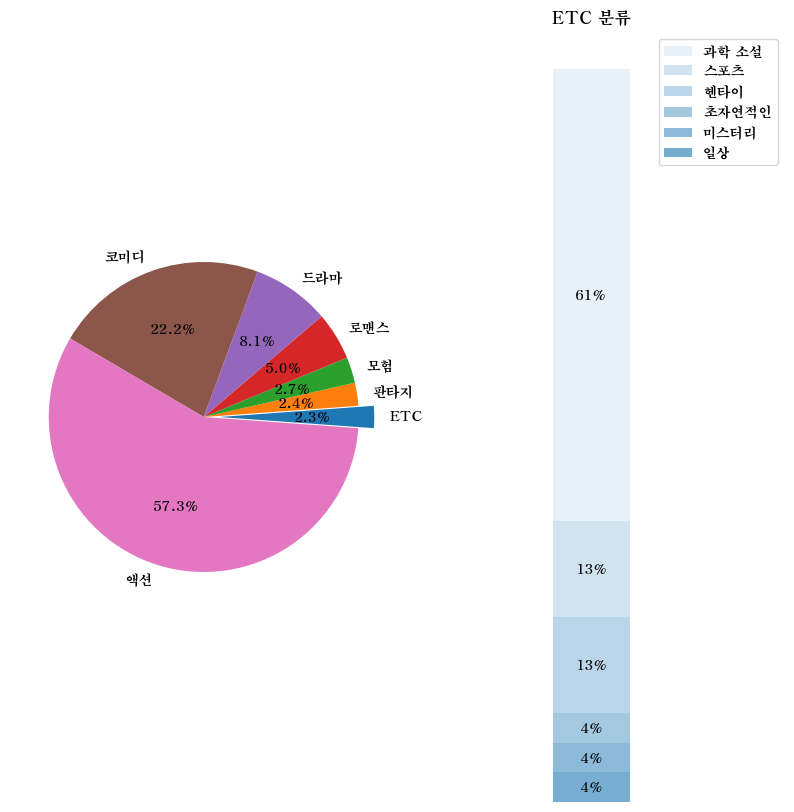

In [210]:
from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = list(p1.values)#[.27, .56, .17]
labels = list(p1.index) #['Approve', 'Disapprove', 'Undecided']
explode = [0.1, 0, 0, 0, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = list(p2.values)  #[.33, .54, .07, .06]
age_labels = list(p2.index)  #['Under 35', '35-49', '50-65', 'Over 65']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.1 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('ETC 분류')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)



plt.show()